#### Step 1:  Generate dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = np.linspace(-3, 3, 1000).reshape(-1, 1)
Y = X ** 2

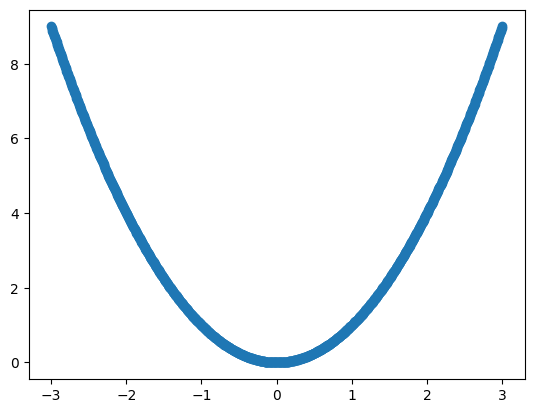

In [3]:
plt.scatter(X, Y)
plt.show()

#### Step 2: Split the dataset as training and testing dataset

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

#### Step 3: Building Linear Regression Model

In [5]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()

### Train the model

In [6]:
lin_model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Test the model

In [7]:
y_pred_lin = lin_model.predict(x_test)

### Visualize the predicted model and the actual model

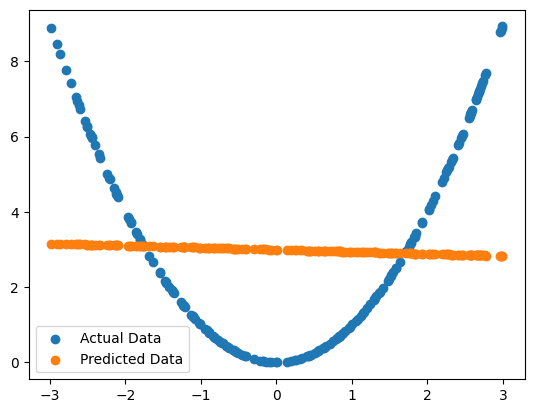

In [8]:
plt.scatter(x_test, y_test, label="Actual Data")
plt.scatter(x_test, y_pred_lin, label="Predicted Data")
plt.legend()
plt.show()

### Step 4: Building with ANN Model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2025-07-02 11:45:43.273246: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-02 11:45:43.661892: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
nl_model = Sequential()
layer = Dense(20, "relu", input_shape=(1,))
nl_model.add(layer)  # Hidden layer
nl_model.add(Dense(20, "relu"))
nl_model.add(Dense(1))

2025-07-02 11:45:48.033434: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-07-02 11:45:48.243537: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-07-02 11:45:48.243725: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-07-02 11:45:48.251136: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-07-02 11:45:48.251314: I tensorflow/compile

### Compile ANN

In [11]:
nl_model.compile("adam", "mse", metrics=["accuracy"])

### Train the model

In [12]:
nl_model.fit(x_train, y_train, epochs=100, batch_size=8192)

Epoch 1/100


2025-07-02 11:46:06.717565: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2025-07-02 11:46:06.761351: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x562b9c431c60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-07-02 11:46:06.761411: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-07-02 11:46:06.819142: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-07-02 11:46:06.971163: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8907
2025-07-02 11:46:07.165786: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:231] Falling back to the CUDA driver for PTX compilation; ptxas d

1/1 [==============================] - 5s 5s/step - loss: 17.0641 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 16.9236 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 16.7844 - accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 16.6465 - accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 16.5099 - accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 16.3747 - accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 16.2408 - accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 16.1082 - accuracy: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 0s 23ms/step - loss: 15.9770 - accuracy: 0.0000e+00
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 15.8471 - accu

### Test the model

In [14]:
y_pred_nl = nl_model.predict(x_test)

7/7 [==============================] - 0s 4ms/step


### Visualize the model

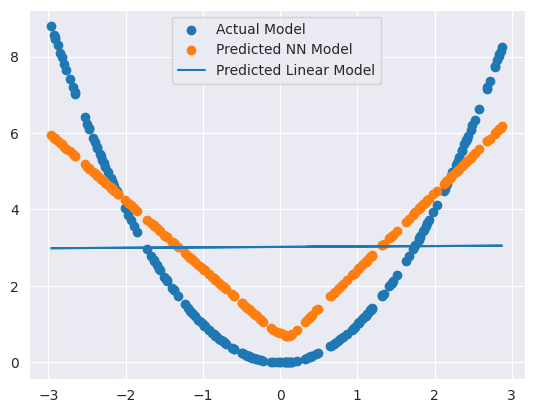

In [15]:
plt.scatter(x_test, y_test, label="Actual Model")
plt.scatter(x_test, y_pred_nl, label="Predicted NN Model")
plt.plot(x_test, y_pred_lin, label="Predicted Linear Model")
plt.legend()

### Evaluate ANN model using metrics

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [17]:
mse = mean_squared_error(y_test, y_pred_nl)
mae = mean_absolute_error(y_test, y_pred_nl)
r2 = r2_score(y_test, y_pred_nl)

In [18]:
print(f"MSE: {mse}\nMAE: {mae}\nR2 Score: {r2}")

MSE: 1.4670864416649407
MAE: 1.08116629996876
R2 Score: 0.7875731405412766
